In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data = pickle.load(open('EDA_t20_data.pkl', 'rb'))

## Sample 5 records

In [123]:
data.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,total_runs,year
31955,India,England,Colombo,125,22,7,7.653061,41.0,170,2012
30065,New Zealand,South Africa,Hamilton,80,59,9,7.868852,36.0,173,2012
44052,Pakistan,Bangladesh,Mirpur,119,19,7,7.069307,43.0,141,2015
16314,Bangladesh,Australia,Cape Town,31,83,10,5.027027,28.0,123,2007
12369,Pakistan,England,Manchester,100,54,8,9.090909,52.0,190,2020


#### Shape of the Dataset

In [8]:
data.shape

(38477, 10)

### Dataset Information

- batting_team/bowling_team -> Teams which is batting/bowling
- city -> City in which match conducted
- current_score -> Runs scored by the batting_team at the moment
- balls_left -> Remaining bowls to be bowled
- wickets_left -> Wickets remaining for batting_team
- crr -> Runrate of the innings
- last_five -> Runs scored by the batting_team in the last 5 overs(30 balls)
- total_runs -> total runs scored by the batting_time by the end of their innings
- year -> Year in which match happened

In [10]:
data.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
total_runs       0
year             0
dtype: int64

There are no missing values

## Check Data Types

In [16]:
data.dtypes

batting_team      object
bowling_team      object
city              object
current_score      int64
balls_left         int64
wickets_left       int32
crr              float64
last_five        float64
total_runs         int64
year               int32
dtype: object

## Check Unique values

In [18]:
data.nunique()

batting_team       10
bowling_team       10
city               35
current_score     241
balls_left         99
wickets_left       11
crr              5506
last_five          78
total_runs        134
year               16
dtype: int64

In [19]:
data.describe()

,current_score,balls_left,wickets_left,crr,last_five,total_runs,year
count,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000,38477.000000
mean,94.122541,45.881514,6.737428,7.567335,38.523248,160.132001,2013.563583
std,41.626571,26.548397,2.031181,1.719908,11.808327,32.052503,3.971909
min,12.000000,0.000000,0.000000,2.270270,10.000000,72.000000,2005.000000
25%,61.000000,23.000000,5.000000,6.371681,30.000000,139.000000,2010.000000
50%,89.000000,46.000000,7.000000,7.500000,38.000000,159.000000,2014.000000
75%,123.000000,69.000000,8.000000,8.625000,46.000000,182.000000,2017.000000
max,263.000000,98.000000,10.000000,16.600000,89.000000,263.000000,2020.000000


#### - Most runs scored by a team in one Innings is 263
#### - Least runs scored by a team in one Innings is 72
#### - Data consist of matches happend in 15 Years (2005 - 2020)

### Teams that are considered in the Dataset


In [20]:
data['batting_team'].unique()

array(['India', 'New Zealand', 'Pakistan', 'Bangladesh', 'Sri Lanka',
       'West Indies', 'Australia', 'South Africa', 'Afghanistan',
       'England'], dtype=object)

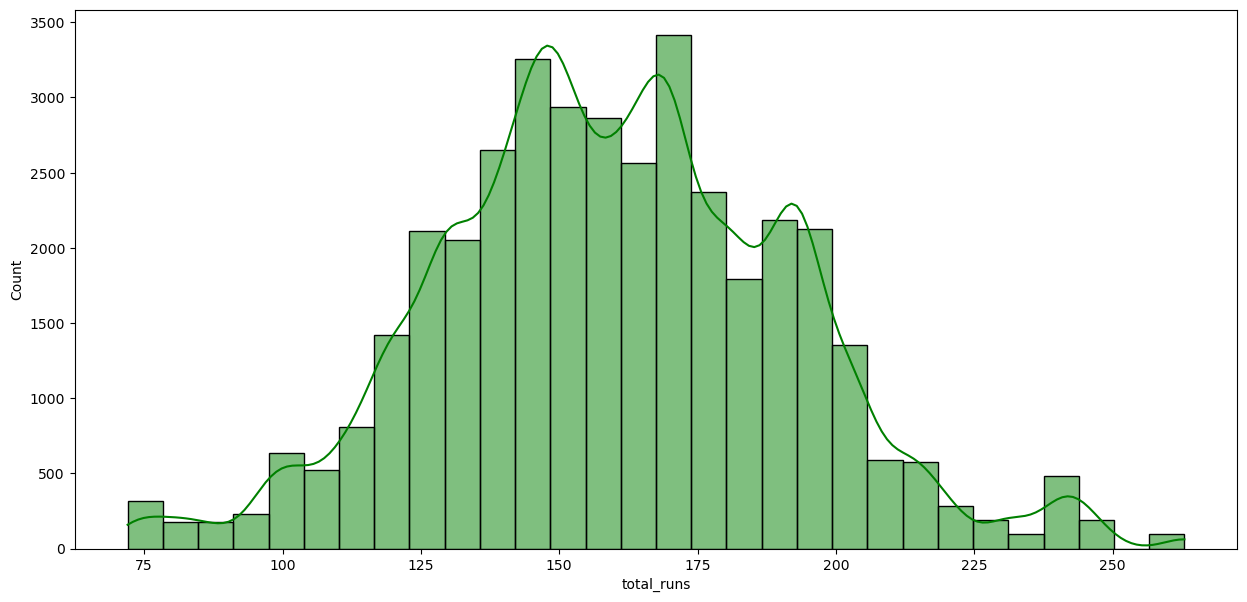

In [25]:
fig, axs = plt.subplots( figsize=(15, 7))
sns.histplot(data=data,x='total_runs',bins=30,kde=True,color='g')
plt.show()

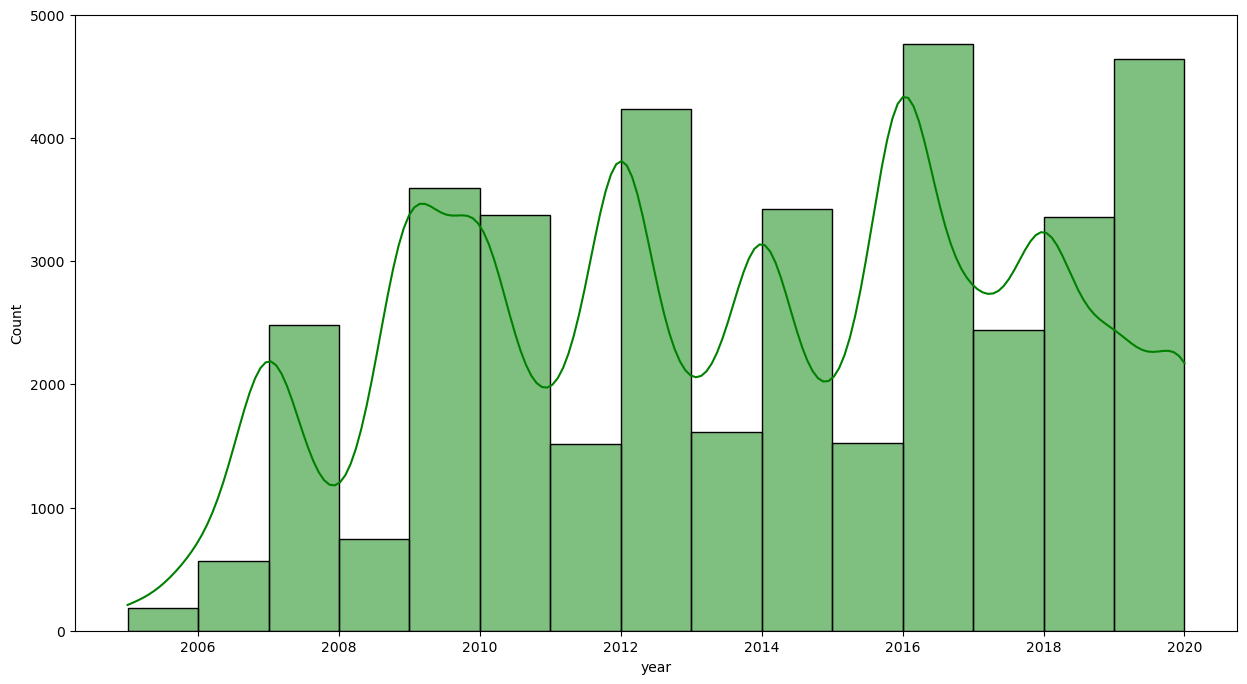

In [30]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.histplot(data=data,x='year',bins=15,kde=True,color='g')
plt.show()

### Most matches happened in the year 2016

In [31]:
data['total_runs'].idxmax()

50351

In [46]:
data.loc[50351, ['batting_team', 'bowling_team', 'city', 'total_runs', 'year']]

batting_team    Australia
bowling_team    Sri Lanka
city            Pallekele
total_runs            263
year                 2016
Name: 50351, dtype: object

### Most runs was Scored by Australia against Srilanka in 2016 at Pallekele which was 263 runs

In [47]:
data['total_runs'].idxmin()

39012

In [48]:
data.loc[39012, ['batting_team', 'bowling_team', 'city', 'total_runs', 'year']]

batting_team    Afghanistan
bowling_team     Bangladesh
city                 Mirpur
total_runs               72
year                   2014
Name: 39012, dtype: object

### Least runs was Scored by Afghanistan against Bangladesh in 2014 at Mirpur which was 72 runs

In [73]:
grouped_df = data.groupby('batting_team')['total_runs'].sum()
grouped_df
runs_each_team = grouped_df.loc[:, ['total_runs']]
runs_each_team

,total_runs
batting_team,
Afghanistan,66537
Australia,695351
Bangladesh,285612
England,583175
India,726428
New Zealand,900500
Pakistan,795679
South Africa,763222
Sri Lanka,753237


In [86]:
total_runs_eachTeam = pd.DataFrame(data, index = index)

In [90]:
total_runs_eachTeam

,Teams,total_runs
1,Afghanistan,66537
2,Australia,695351
3,Bangladesh,285612
4,England,583175
5,India,726428
6,New Zealand,900500
7,Pakistan,795679
8,South Africa,763222
9,Sri Lanka,753237
10,West Indies,591658


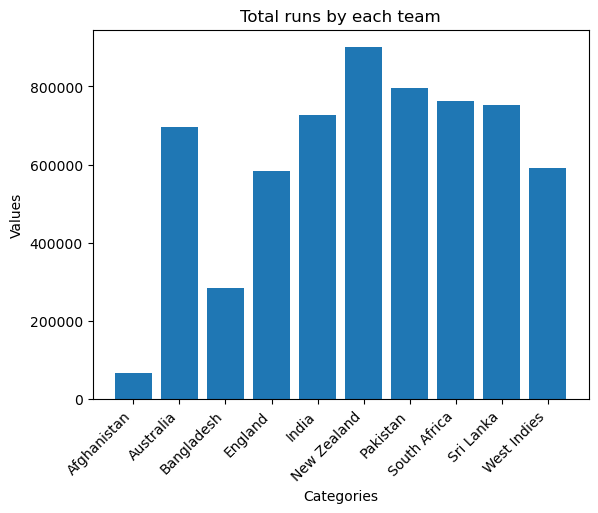

In [100]:
plt.bar(x=total_runs_eachTeam['Teams'], height=total_runs_eachTeam['total_runs'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Total runs by each team')
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
win_df = pickle.load(open('dataset_level1.pkl', 'rb'))

In [105]:
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'    
]

In [113]:
win_df = win_df[win_df['info.outcome.winner'].isin(teams)]

In [117]:
most_wins = win_df['info.outcome.winner'].value_counts()

In [120]:
most_wins

Pakistan        95
India           85
Australia       69
South Africa    69
New Zealand     64
England         64
Sri Lanka       57
West Indies     52
Afghanistan     51
Bangladesh      29
Name: info.outcome.winner, dtype: int64

### Pakistan won the most T20 matches in the span of 2005-2020
### and Afghanistan being the least

In [126]:
city_valuecounts = data['city'].value_counts()

In [129]:
most_played_city = pd.DataFrame({'City': city_valuecounts.index, 'Balls bowled': city_valuecounts.values})

In [130]:
most_played_city

,City,Balls bowled
0,Colombo,3129
1,Mirpur,2608
2,Johannesburg,2548
3,Dubai,2273
4,Auckland,1923
5,Cape Town,1818
6,London,1611
7,Pallekele,1573
8,Barbados,1557
9,Sydney,1202


In [131]:
most_played_10_cities = most_played_city.head(10)

### Top 10 Cities which hosted the Most Matches

In [132]:
most_played_10_cities

,City,Balls bowled
0,Colombo,3129
1,Mirpur,2608
2,Johannesburg,2548
3,Dubai,2273
4,Auckland,1923
5,Cape Town,1818
6,London,1611
7,Pallekele,1573
8,Barbados,1557
9,Sydney,1202


#### -Colombo Hosted the most matches followed by Mirpur